In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
df = pd.read_csv("modified_datasets/stock_ticks")
df = df.set_index('Date')

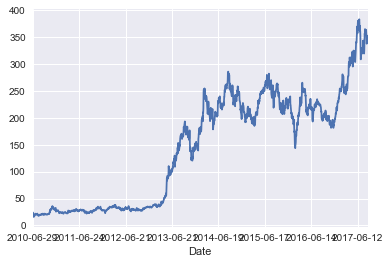

In [4]:
df['tsla_close'].plot()

In [9]:
def gm_returns(col):
    gm_returns = np.log(df[col]).diff()
    gm_returns.plot()
    return gm_returns

In [6]:
import statsmodels as sm
decomposition = sm.tsa.seasonal.seasonal_decompose(df['tsla_close'].values, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

AttributeError: module 'statsmodels' has no attribute 'tsa'

In [7]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=20)
    rolstd = pd.rolling_std(timeseries, window=20)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')

    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

In [31]:
#ACF and PCF plot
import statsmodels.api
def acf_pacf(series):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = statsmodels.graphics.tsaplots.plot_acf(series, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = statsmodels.graphics.tsaplots.plot_pacf(series, lags=40, ax=ax2)


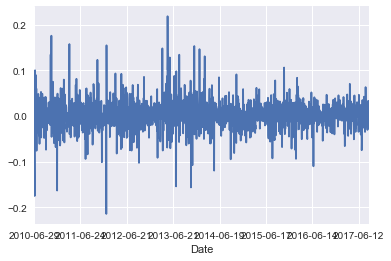

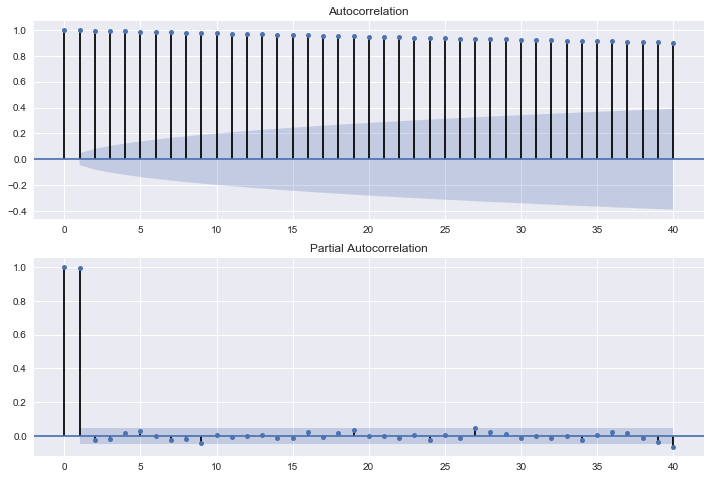

In [33]:
gm_tsla = gm_returns('tsla_close').iloc[1:]
acf_pacf(df['tsla_close'].values)

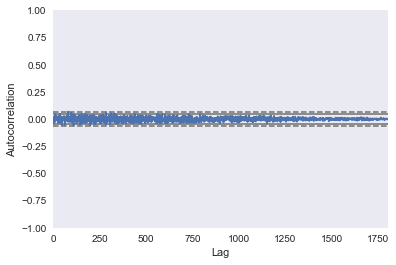

In [35]:
from pandas.tools.plotting import autocorrelation_plot


autocorrelation_plot(gm_tsla)
plt.show()

In [47]:
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
 
def ARIMA(series):
    X = series
    size = int(len(X) * 0.9)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,5))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    # plot
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()

In [ ]:
ARIMA(gm_tsla.values)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/statespace/tools.py:405: RuntimeWarning: invalid value encountered in sqrt
  x = r / ((1 - r**2)**0.5)


predicted=nan, expected=-0.004462
predicted=nan, expected=-0.000572
predicted=nan, expected=0.001300
predicted=nan, expected=0.029292
predicted=nan, expected=0.002722
predicted=nan, expected=-0.005602
predicted=nan, expected=0.024547
predicted=nan, expected=0.001184
predicted=nan, expected=0.029454
predicted=nan, expected=-0.005234
predicted=nan, expected=0.003604
predicted=nan, expected=0.023188
predicted=nan, expected=0.028602
predicted=nan, expected=0.000956
predicted=nan, expected=-0.023297
predicted=nan, expected=-0.004622
predicted=nan, expected=0.015325
predicted=nan, expected=0.045055
predicted=nan, expected=-0.001058
predicted=nan, expected=0.009918
predicted=nan, expected=0.009863
predicted=nan, expected=-0.006115
predicted=nan, expected=-0.000609
predicted=nan, expected=-0.000610
predicted=nan, expected=0.034925
predicted=nan, expected=-0.009169
predicted=nan, expected=0.011732
predicted=nan, expected=0.022402
predicted=nan, expected=0.003971
predicted=nan, expected=0.016976

In [ ]:
df